In [1]:
import arcpy
import os
from arcpy.sa import *
arcpy.env.overwriteOutput = True

In [2]:
arcpy.env.workspace = "Y:\\Student_Working\\2020_2021\\AHIABLE\\A1132_Advanced_GIS\\Assignment_data\\NA_assignment_data\\OS_Terrain_5\\terrain-5-dtm_968812\\sz"
            
iow_outline_Polygon = r"\Student_Working\2020_2021\AHIABLE\A1132_Advanced_GIS\Assignment_data\NA_assignment_data\iow_outline.dxf\Polygon"


In [3]:
from os import listdir
Rasters = [x for x in listdir(arcpy.env.workspace) if x.endswith('.asc')]

In [4]:
#Mosaicing Rasters

DEM_tif = arcpy.management.MosaicToNewRaster(input_rasters= Rasters, output_location= arcpy.env.workspace, raster_dataset_name_with_extension="DEM.tif", coordinate_system_for_the_raster="PROJCS['British_National_Grid',GEOGCS['GCS_OSGB_1936',DATUM['D_OSGB_1936',SPHEROID['Airy_1830',6377563.396,299.3249646]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',400000.0],PARAMETER['False_Northing',-100000.0],PARAMETER['Central_Meridian',-2.0],PARAMETER['Scale_Factor',0.9996012717],PARAMETER['Latitude_Of_Origin',49.0],UNIT['Meter',1.0]]", pixel_type="32_BIT_FLOAT", cellsize=5, number_of_bands=1, mosaic_method="LAST", mosaic_colormap_mode="FIRST")[0]
DEM_tif = arcpy.Raster(DEM_tif)

In [5]:
Sr = arcpy.SpatialReference("British National Grid")

In [6]:
spatial_ref_DEM = arcpy.Describe(DEM_tif).SpatialReference
if spatial_ref_DEM.name != "Sr":
    arcpy.DefineProjection_management(DEM_tif, Sr)

In [7]:
arcpy.Describe(DEM_tif).SpatialReference

type,Projected
name,British_National_Grid
factoryCode,27700
linearUnitName,Meter
GCS.name,GCS_OSGB_1936


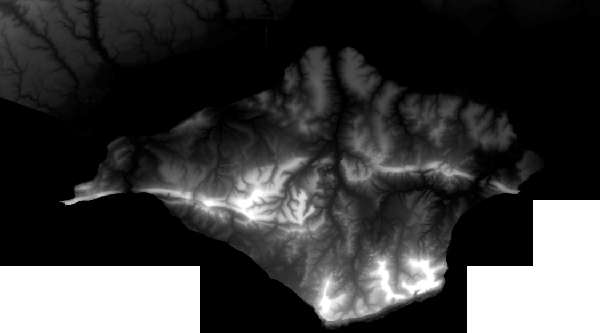

In [8]:
DEM_tif

In [9]:
spatial_ref = arcpy.Describe(iow_outline_Polygon).SpatialReference
if spatial_ref.name == "Unknown":
    arcpy.DefineProjection_management(iow_outline_Polygon, Sr)

In [10]:
arcpy.Describe(iow_outline_Polygon).SpatialReference

type,Projected
name,British_National_Grid
factoryCode,27700
linearUnitName,Meter
GCS.name,GCS_OSGB_1936


In [11]:
#Clipping to the Isle of Wight

DEM_Clip = "Y:\\Student_Working\\2020_2021\\AHIABLE\\A1132_Advanced_GIS\\Assignment_data\\Assignment_AGIS.gdb\\DEM_Clip_1"
arcpy.management.Clip(in_raster=DEM_tif, rectangle="429067 75246 465810 96675", out_raster=DEM_Clip, in_template_dataset=iow_outline_Polygon, nodata_value="3.39999995214436e+38", clipping_geometry="ClippingGeometry", maintain_clipping_extent="NO_MAINTAIN_EXTENT")
DEM_Clip = arcpy.Raster(DEM_Clip)

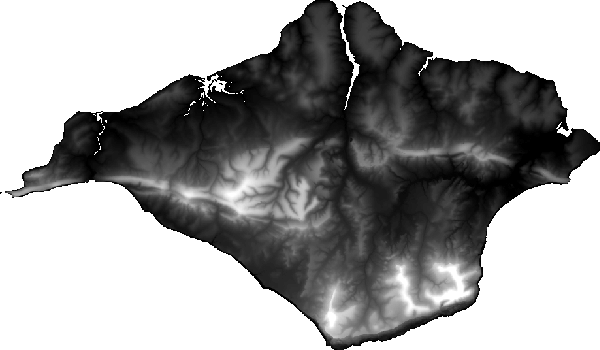

In [12]:
DEM_Clip